# Circular Restricted Three Body Problem Derrivation
*SymPy* is usefull for:
1) Derriving the full equations of motion
2) Optimizing code through common subexpression elimination
3) Generating complicated $\LaTeX$ expressions. *SymPy* is **open-source**.

In [1]:
from sympy import *

In [2]:
# State
x, y, z, vx, vy, vz, m = symbols('x y z vx vy vz m')
r                      = Matrix([x, y, z])
v                      = Matrix([vx, vy, vz])
s                      = Matrix([r, v, [m]])

# Costate
lx, ly, lz, lvx, lvy, lvz, lm = symbols('lx ly lz lvx lvy lvz lm')
lr                            = Matrix([lx, ly, lz])
lv                            = Matrix([lvx, lvy, lvz])
l                             = Matrix([lr, lv, [lm]])

# Full State
fs = Matrix([s, l])

# Controls
u, ax, ay, az = symbols('u ax ay az')
a             = Matrix([ax, ay, az])
cont          = Matrix([[u], a])

# Parameters
Isp, g0, mu, T, eps = symbols('Isp g0 mu T eps')
c                   = Isp*g0

In [3]:
# Intermediates
r1 = sqrt((x + mu)**2 + y**2 + z**2)
r2 = sqrt((x + mu -1)**2 + y**2 + z**2)

In [4]:
# Position Dependence
g = Matrix([
        x - (1 - mu)*(x + mu)/r1**3 - mu*(x + mu - 1)/r2**3,
        y - (1 - mu)*y/r1**3 - mu*y/r2**3,
        -(1 - mu)*z/r1**3 - mu*z/r2**3
    ])
# Velocity Dependence
h = Matrix([2*vy, -2*vx, 0])

In [5]:
# State Equations of Motion
ds = Matrix([v, g + h + u*T*a/m, [-u*T/c]])

In [6]:
# Homotopic Cost Lagrangian
L = T*(u - eps*u*(1 - u))/c

In [7]:
# Hamiltonian
Hamiltonian = l.dot(ds) + L

In [8]:
# Location Dependence Derrivative
G = g.jacobian(r)
# Velocity Dependence Derrivative
H = h.jacobian(v)

In [9]:
# Costate Equations of Motion
dl = -Matrix([Hamiltonian.diff(i) for i in s])

In [10]:
# Fullstate Equations of Motion
dfs = Matrix([ds, dl])

In [11]:
# Switching Function
S = -lv.norm()*c/m - lm + 1

In [12]:
# Optimal Thrust Direction
aopt = -lv.normalized()

In [13]:
# Derrivative of Fullstate
ddfs = dfs.jacobian(fs)

# Implementation
Initialisation parameters sourced from [*Low-Thrust Minimum Fuel Optimization in the
Circular Restricted Three-Body Problem* (Zhang et. al.)](https://home.aero.polimi.it/topputo/data/uploads/papers/articles/article-2015-2.pdf)

The nonlinear programming problem's decision vector is
$$ [t_f, \lambda_x(t_i), \lambda_y(t_i), \lambda_z(t_i), \lambda_{v_x}(t_i), \lambda_{v_y}(t_i), \lambda_{v_z}(t_i), \lambda_m(t_i)] $$

In [14]:
import sys
sys.path.append('../')
from trajectory.space import CRTBP
from numpy import *

In [15]:
# Parameters
mu  = 1.21506683e-2 # Gravitational parameter
T   = 10. # Maximum thrust [N]
Isp = 2000. # Specific impulse
eps = 1. # Homotopy paramter (energy-minimisation)

In [16]:
# Initial state
si = array([-0.019488511458668, -0.016033479812051, 0,
            8.918881923678198, -4.081793688818725, 0,
            1000], float)
# Target state
st = array([0.823385182067467, 0, -0.022277556273235,
            0, 0.134184170262437, 0,
            1000], float)
# Decision variable guess
di = array([8.6,                            # Time of flight [days]
            5.616017, 32.875896, -0.094522, # Position costates
            -0.101606, 0.044791, -0.000150, # Velocity costates
            0.133266], float)               # Mass costate

In [17]:
# Intialise the problem
prob = CRTBP(mu, T, Isp, eps, si, st)

In [18]:
# Shoot with the guessed decision vector
t, trajectory, control = prob.Shoot(di)

/usr/lib/python2.7/dist-packages/scipy/integrate/_ode.py:1035: UserWarning: dop853: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


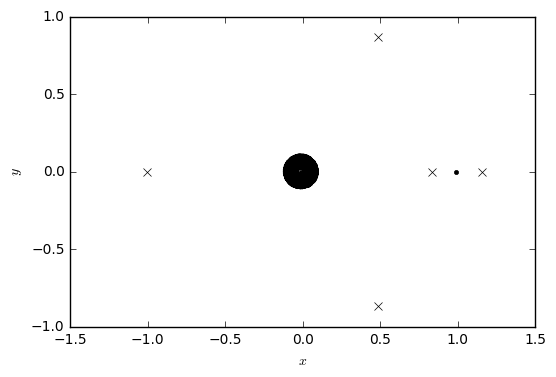

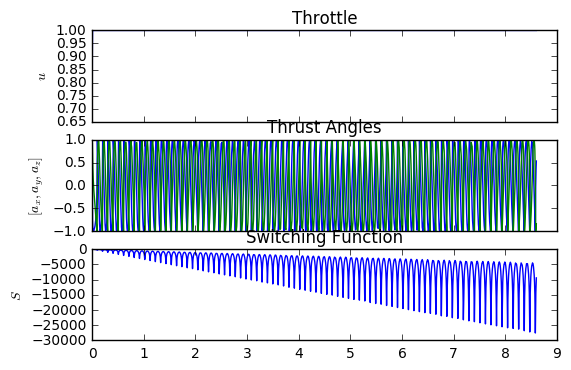

In [19]:
# Visualise the trajectory and control
prob.PlotTraj(trajectory)
prob.PlotCont(control, t)

In [21]:
from PyGMO import *

In [22]:
pop = population(prob, 1)

In [25]:
pop.champion.x

(20.964182443168955,
 86.17739453092952,
 21.388144487138305,
 -58.59878514972863,
 -38.66014418980157,
 -72.04833251275673,
 92.0791134826608,
 0.08826789002824853)

In [27]:
alg = algorithm.scipy_slsqp(screen_output=True)

In [ ]:
pop = alg.evolve(pop)

  NIT    FC           OBJFUN            GNORM
